In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [10]:

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([[2], [4], [6], [8], [10]])

X_norm = X / 5.0 

np.random.seed(0)
W1 = np.random.randn(1, 4)
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))

learning_rate = 0.1
epochs = 401
losses = []

In [11]:
for epoch in range(epochs):
    # Forward Propagation
    z1 = np.dot(X_norm, W1) + b1
    a1 = sigmoid(z1)
    y_hat = np.dot(a1, W2) + b2 

    loss = np.mean((y - y_hat)**2)
    losses.append(loss)


    if epoch % 40 == 0:
        print(f"Epoch {epoch:4} | MSE Loss: {loss:.6f}")

    # Backpropagation
    error_output = y_hat - y
    dW2 = np.dot(a1.T, error_output)
    db2 = np.sum(error_output, axis=0, keepdims=True)
    
    error_hidden = np.dot(error_output, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X_norm.T, error_hidden)
    db1 = np.sum(error_hidden, axis=0, keepdims=True)

    # Updating Weights and Biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

Epoch    0 | MSE Loss: 28.940258
Epoch   40 | MSE Loss: 0.798467
Epoch   80 | MSE Loss: 0.075930
Epoch  120 | MSE Loss: 0.158476
Epoch  160 | MSE Loss: 0.139186
Epoch  200 | MSE Loss: 0.080563
Epoch  240 | MSE Loss: 0.077986
Epoch  280 | MSE Loss: 0.101551
Epoch  320 | MSE Loss: 0.104968
Epoch  360 | MSE Loss: 0.080679
Epoch  400 | MSE Loss: 0.066943


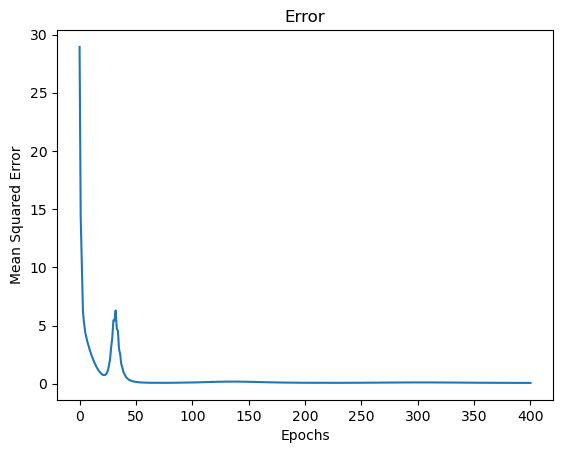

In [12]:
plt.plot(losses)
plt.title("Error")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

In [13]:
val = float(input("Enter a value for X to predict Y: "))
    
test_input = np.array([[val]]) / 5.0
    
z1_t = np.dot(test_input, W1) + b1
a1_t = sigmoid(z1_t)
prediction = np.dot(a1_t, W2) + b2
    
print(f"\nModel Prediction for X={val}: {prediction[0][0]:.4f}")
print(f"Expected Value (2X): {val * 2}")


Model Prediction for X=6.0: 11.0993
Expected Value (2X): 12.0
